# Milestone 02: Exploratory Data Analysis (EDA)
***

In [1]:
#Import Libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [64]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts import project_functions

df = project_functions.load_and_process('..\..\data\data_raw\*.csv')
df.columns

Index(['language', 'review', 'timestamp_created', 'timestamp_updated',
       'recommended', 'votes_up', 'votes_funny', 'steam_algorithm_score',
       'comment_count', 'received_for_free', 'written_during_early_access',
       'num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'playtime_at_review', 'last_played',
       'game_id'],
      dtype='object')

Our project focuses on analyzing Steam reviews of various games in a wide range of genres. A contributing factor to the quality of a review may involve the user's length of gaming experience - how many games have they played prior to writing this review?

The more gaming experience a user has, the more likely they are to give a more extensive review on the game as they can compare it to other games they've played to weight the pros and cons.

Below is a visualization of the distribution between the number of users (frequency) and the number of games owned:

In [3]:
frequency = df['num_games_owned'].value_counts()

In [20]:
data = pd.DataFrame({
    'Number of Games Owned': pd.to_numeric(frequency.index),
    'Number of Users': frequency.values
})
data_s = data.sort_values(['Number of Games Owned'])

<AxesSubplot:xlabel='Number of Games Owned', ylabel='Number of Users'>

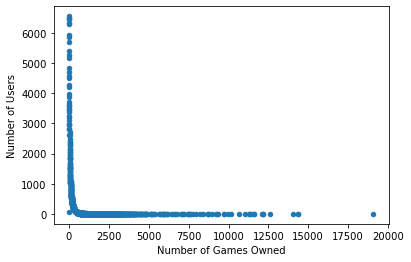

In [21]:
data_s.plot( x='Number of Games Owned', y='Number of Users', kind='scatter')

As we can see, most of our data comes from users that own less than 1000 games - which was kind of expected. Let's view this data again using a table to get the actual values:

In [42]:
data_t = data_s.transpose()
data_t

,501,25,1,3,0,2,4,5,6,7,...,1778,2023,2096,2029,2068,1872,2147,1466,1776,1597
Number of Games Owned,0,1,2,3,4,5,6,7,8,9,...,11568,11607,12110,12138,12172,12599,14041,14329,14341,19072
Number of Users,55,3433,6511,6466,6557,6474,6349,6302,5944,5865,...,1,1,1,1,1,1,1,2,1,2


In [61]:
data_50 = data_s.head(50)
sum_val = data_50.sum()
print("Sum of the first 50 data entries:")
print(sum_val)

Sum of the first 50 data entries:
Number of Games Owned      1225
Number of Users          189030
dtype: int64


In [62]:
sum_val = data_t.sum(axis=1)
print("Overall Sum in the dataset:")
print(sum_val)

Overall Sum in the dataset:
Number of Games Owned    3393759
Number of Users           391332
dtype: int64


In [63]:
max_val = data_t.max(axis=1)
print("Overall Maximum in the dataset:")
print(max_val)

Overall Maximum in the dataset:
Number of Games Owned    19072
Number of Users           6557
dtype: int64


From this quick analysis, we see that highest number of games owned is 19 072 and the lowest is 0. Also note that most reviews came from people that owned 1 to 5 games (at least 6000 users each), with the highest being 4 Steam games. And as we see from the tables and calculations above, those owning 50 or less games account for almost half of all the reviews in our data.

One interesting point to note is that there are 55 game reviews that came from reviewers that don't own any Steam games, which brings us to wonder: did they obtain the game from a different source other than Steam or did they review the game without even playing it yet?

Much like the amount of gaming experience, the amount of playtime is also an important contributing factor. Some may leave a review after 5-10 minutes of playing and others might review after a week of playing. This will effect the content of the review as those that have a short playtime may leave biased or inaccurate reviews as it's mostly based on first impressions of the game. Meanwhile, those that have a longer playtime not only review based on first impressions, but they also have some experience to comment on other aspects as well.

In [67]:
playtime = df['playtime_at_review'].value_counts()
playtime

181       274
180       271
185       261
184       246
182       242
         ... 
28292       1
288115      1
32153       1
217553      1
25122       1
Name: playtime_at_review, Length: 65096, dtype: int64

In [68]:
data_p = pd.DataFrame({
    'Play Time in Minutes': pd.to_numeric(playtime.index),
    'Number of Users': playtime.values
})
data_ps = data_p.sort_values(['Play Time in Minutes'])

In [ ]:
data_ps.plot( x='Play Time in Minutes', y='Number of Users', kind='bar')